In this project, I contribute to the development of a mobile app that is meant to help lottery addicts better estimate their chances of winning.

In [1]:
import pandas as pd

lottery_canada = pd.read_csv("649.csv")
lottery_canada.shape

(3665, 11)

In [2]:
lottery_canada.head()

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34
3,649,4,0,7/3/1982,3,9,10,13,20,43,34
4,649,5,0,7/10/1982,5,14,21,31,34,47,45


exp_p = No. of time event occurred/ no. of time experiment performed

In [3]:
import numpy as np

In [4]:
np.random.randint(0,2) 

0

In [5]:
def toss():
    t = np.random.randint(0,2) 
    if t ==1:
        return "Head"
    else:
        return "Tail"

In [6]:
toss()

'Head'

In [7]:
head = 0
exp = 0
ph = []                 

np.random.seed(123)       

for i in range(1,10001):    
    exp+=1                  
    t= toss()
    if t =="Head":           
        head +=1
        e_p = head/exp       
        ph.append(e_p)       

In [8]:
head = pd.Series(ph)

In [9]:
head.shape

(4972,)

In [10]:
head

0       0.500000
1       0.250000
2       0.333333
3       0.363636
4       0.416667
          ...   
4967    0.497049
4968    0.497099
4969    0.497149
4970    0.497150
4971    0.497200
Length: 4972, dtype: float64

In [11]:
import matplotlib.pyplot as plt

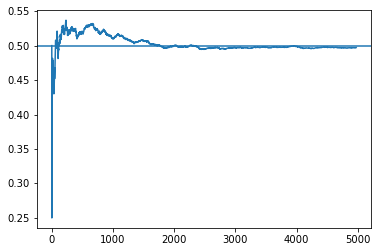

In [12]:
head.plot()
plt.axhline(0.5)
plt.show()

t_p = number of successful event/number of total possible outcomes

In [13]:
event_1 = {2,4,6}
event_2 = {4,5,6}

In [14]:
def fact(n):
    if n == 0:
        return 1
    else:
        factorial = n
        for i in range(n-1,1,-1):  #-1 means it will work in reverse order, 5, 4, 3, 2, 1
            factorial *= i
        return factorial

In [15]:
def fact(n):                    #    my work    #########
        factorial = n
        for i in range(n-1,0,-1):  #-1 means it will work in reverse order, 5, 4, 3, 2, 1
            factorial *= i
        return factorial

In [16]:
def permutaion(n,k):  # order matter - permutation. "k" is selection, from the total cards "n"
    num = fact(n)       
    den = fact(n-k)
    return num/den

In [17]:
permutaion(52,4)

6497400.0

In [18]:
{1,2,3,4,5}

fact(5)

120

In [21]:
def comb(n, k):
    num = fact(n)
    den = fact(k)*fact(n-k)
    return num/den

In [22]:
comb(49,6)  

13983816.0

In [23]:
def one_ticket(lst_6):
    num_succ = 1
    total_outcomes = comb(49,6)
    prob = num_succ*100/total_outcomes
    print(f"""Your chance to win the big prize 
    with the numbers {lst_6} are {prob:.7f}%.     
    In other words, you have a 1 in {total_outcomes:,} chances to win""")

In [24]:
one_ticket([1,3,7,49,43,21])

Your chance to win the big prize 
    with the numbers [1, 3, 7, 49, 43, 21] are 0.0000072%.     
    In other words, you have a 1 in 13,983,816.0 chances to win


In [25]:
lottery_canada.tail()

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
3660,649,3587,0,6/6/2018,10,15,23,38,40,41,35
3661,649,3588,0,6/9/2018,19,25,31,36,46,47,26
3662,649,3589,0,6/13/2018,6,22,24,31,32,34,16
3663,649,3590,0,6/16/2018,2,15,21,31,38,49,8
3664,649,3591,0,6/20/2018,14,24,31,35,37,48,17


In [26]:
event = {"Tail"}
outcomes = {"Tail", "Head"}

In [27]:
def wininng(series):  
    return set(series[4:10]) 

In [28]:
s = lottery_canada.apply(wininng, axis = 1)
s

0        {3, 41, 11, 12, 43, 14}
1        {33, 36, 37, 39, 8, 41}
2         {1, 6, 39, 23, 24, 27}
3         {3, 9, 10, 43, 13, 20}
4        {34, 5, 14, 47, 21, 31}
                  ...           
3660    {38, 40, 41, 10, 15, 23}
3661    {36, 46, 47, 19, 25, 31}
3662     {32, 34, 6, 22, 24, 31}
3663     {2, 38, 15, 49, 21, 31}
3664    {35, 37, 14, 48, 24, 31}
Length: 3665, dtype: object

In [29]:
def check_hist(lst_6,series = s):
    user_numbers = set(lst_6)     #set will show repeated no. one time
    count = 0
    for i in series:
        if user_numbers == i:
            count +=1
    if count ==0:
        return f"""These {lst_6} numbers have never won a big prize"""  
    else:
        return f"""This {lst_6} numbers have won {count} time(s).
        This doesnt mean you won next time. your chance for wininng next time is 0.0000072%.
        In other words, you have a 1 in chances to win 13,983,816.0"""
        
    

In [30]:
check_hist([1,2,3,5,6,9]) # {9,1,5,6,3,2}

'These [1, 2, 3, 5, 6, 9] numbers have never won a big prize'

In [31]:
{1,2,3,5,6,9} =={9,1,5,6,3,2}

True

In [32]:
print(check_hist([38, 40, 41, 10, 15, 23]))

This [38, 40, 41, 10, 15, 23] numbers have won 1 time(s).
        This doesnt mean you won next time. your chance for wininng next time is 0.0000072%.
        In other words, you have a 1 in chances to win 13,983,816.0


In [33]:
def one_ticket(n_tickets):
    num_succ = n_tickets
    total_outcomes = comb(49,6)
    prob = num_succ*100/total_outcomes
    
    if n_tickets ==1:
        return f"""Your chance to win the big prize 
        with one ticket is {prob:.7f}%.
        In other words, you have a 1 out of {total_outcomes:,} chances to win"""
    
    else:
        com = total_outcomes/n_tickets
        return f"""Your chance to win the big prize 
        with one ticket is {prob:.7f}%.
        In other words, you have a 1 out of {com:,} chances to win"""
        

In [34]:
lst = [1,100,252,13983816]

for i in lst:
    print(one_ticket(i))
    print("---------------------------------------------------------------")
    

Your chance to win the big prize 
        with one ticket is 0.0000072%.
        In other words, you have a 1 out of 13,983,816.0 chances to win
---------------------------------------------------------------
Your chance to win the big prize 
        with one ticket is 0.0007151%.
        In other words, you have a 1 out of 139,838.16 chances to win
---------------------------------------------------------------
Your chance to win the big prize 
        with one ticket is 0.0018021%.
        In other words, you have a 1 out of 55,491.333333333336 chances to win
---------------------------------------------------------------
Your chance to win the big prize 
        with one ticket is 100.0000000%.
        In other words, you have a 1 out of 1.0 chances to win
---------------------------------------------------------------


In [36]:
comb(6,5)

6.0

In [39]:
comb(49-5,6-5)

44.0

In [40]:
succ_outcomes = 44*6
total_outcomes = comb(49,6)
pr = succ_outcomes/total_outcomes

pr

1.887896694292888e-05

In [41]:
def win_less_6(winning_number):
    n_com_tickets = comb(6,winning_number)
    remainig_ticket = comb(49-winning_number,6-winning_number)
    success = n_com_tickets*remainig_ticket
    total_outcomes = comb(49,6)
    prob = success /total_outcomes
    
    return f"""Your chance of having {winning_number} winning number
        with this ticket is {prob:.7f}%.
        In other words, you have a 1 out of {total_outcomes:,} chances to win"""

In [42]:
print(win_less_6(5))

Your chance of having 5 winning number
        with this ticket is 0.0000189%.
        In other words, you have a 1 out of 13,983,816.0 chances to win


In [43]:
lst = [2,3,4,5]

for i in lst:
    print(win_less_6(i))
    print("----------------------------------------------------------------------")

Your chance of having 2 winning number
        with this ticket is 0.1913265%.
        In other words, you have a 1 out of 13,983,816.0 chances to win
----------------------------------------------------------------------
Your chance of having 3 winning number
        with this ticket is 0.0217108%.
        In other words, you have a 1 out of 13,983,816.0 chances to win
----------------------------------------------------------------------
Your chance of having 4 winning number
        with this ticket is 0.0010619%.
        In other words, you have a 1 out of 13,983,816.0 chances to win
----------------------------------------------------------------------
Your chance of having 5 winning number
        with this ticket is 0.0000189%.
        In other words, you have a 1 out of 13,983,816.0 chances to win
----------------------------------------------------------------------
